In [12]:
from tensorflow.keras.datasets                   import imdb
from tensorflow.keras.models                     import Sequential
from tensorflow.keras.layers                     import Dense, Conv2D, MaxPooling2D, Dropout, Flatten 
from tensorflow.keras                            import utils
from tensorflow.keras.preprocessing.sequence     import pad_sequences
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks                  import ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection                     import train_test_split
from google.colab                                import files
import numpy as np
import os
import matplotlib.pyplot as plt

In [13]:
max_words = 10000
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_words)


We decode the review text

---



In [14]:
word_index = imdb.get_word_index()


We transform the dictionary to get the word by number

In [15]:
reverse_word_index = dict()
for key, value in word_index.items():
  reverse_word_index[value] = key
# Example
for i in range(1,21):
  print(i,'- >',reverse_word_index[i])

1 - > the
2 - > and
3 - > a
4 - > of
5 - > to
6 - > is
7 - > br
8 - > in
9 - > it
10 - > i
11 - > this
12 - > that
13 - > was
14 - > as
15 - > for
16 - > with
17 - > movie
18 - > but
19 - > film
20 - > on


In [16]:
index   = 3
message = ''
for code in x_train[index]:
  word = reverse_word_index.get(code - 3,'?')
  message += word + ''
message

y_train[index]

1

In [17]:
max_len = 200

x_train = pad_sequences(x_train,maxlen=max_len,padding='post')
x_test  = pad_sequences(x_test,maxlen=max_len,padding='post')
x_train[3]

array([   4,  341,    7,   27,  846,   10,   10,   29,    9, 1906,    8,
         97,    6,  236,    2, 1311,    8,    4,    2,    7,   31,    7,
          2,   91,    2, 3987,   70,    4,  882,   30,  579,   42,    9,
         12,   32,   11,  537,   10,   10,   11,   14,   65,   44,  537,
         75,    2, 1775, 3353,    2, 1846,    4,    2,    7,  154,    5,
          4,  518,   53,    2,    2,    7, 3211,  882,   11,  399,   38,
         75,  257, 3807,   19,    2,   17,   29,  456,    4,   65,    7,
         27,  205,  113,   10,   10,    2,    4,    2,    2,    9,  242,
          4,   91, 1202,    2,    5, 2070,  307,   22,    7, 5168,  126,
         93,   40,    2,   13,  188, 1076, 3222,   19,    4,    2,    7,
       2348,  537,   23,   53,  537,   21,   82,   40,    2,   13,    2,
         14,  280,   13,  219,    4,    2,  431,  758,  859,    4,  953,
       1052,    2,    7, 5991,    5,   94,   40,   25,  238,   60,    2,
          4,    2,  804,    2,    7,    4, 9941,  1

Create model

In [22]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(max_len,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model.fit(x_train,
                  y_train,
                  epochs=30,
                  batch_size=128,
                  validation_split=0.2,
                  )

Epoch 1/30
157/157 [==============================] - 1s 4ms/step - loss: 88.1980 - accuracy: 0.4976 - val_loss: 32.6032 - val_accuracy: 0.5088
Epoch 2/30
157/157 [==============================] - 0s 3ms/step - loss: 16.0038 - accuracy: 0.5300 - val_loss: 8.1120 - val_accuracy: 0.5146
Epoch 3/30
157/157 [==============================] - 0s 3ms/step - loss: 4.8106 - accuracy: 0.5339 - val_loss: 4.9872 - val_accuracy: 0.4962
Epoch 4/30
157/157 [==============================] - 0s 3ms/step - loss: 3.5232 - accuracy: 0.5208 - val_loss: 3.4009 - val_accuracy: 0.4942
Epoch 5/30
157/157 [==============================] - 0s 3ms/step - loss: 1.9532 - accuracy: 0.5267 - val_loss: 1.5156 - val_accuracy: 0.5008
Epoch 6/30
157/157 [==============================] - 0s 3ms/step - loss: 2.3811 - accuracy: 0.5219 - val_loss: 1.8009 - val_accuracy: 0.5044
Epoch 7/30
157/157 [==============================] - 0s 3ms/step - loss: 1.5796 - accuracy: 0.5360 - val_loss: 1.8643 - val_accuracy: 0.5086
Epo

Vizualization

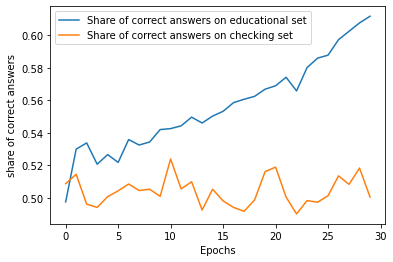

In [26]:
plt.plot(history.history['accuracy'], 
         label='Share of correct answers on educational set')
plt.plot(history.history['val_accuracy'], 
         label='Share of correct answers on checking set')
plt.xlabel('Epochs')
plt.ylabel('share of correct answers')
plt.legend()
plt.show()

In [28]:
scores = model.evaluate(x_test,y_test,verbose=1)
print(round(scores[1] * 100, 4))

782/782 [==============================] - 1s 2ms/step - loss: 1.5542 - accuracy: 0.5079
50.792
